In [99]:
import pandas as pd
import csv
import dask.dataframe as dd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
#get ZIP codes eligible for delivery; examine/clean the ZIP code list
delv_zip = pd.read_csv("Resources\zip_code_raw.csv")
delv_zip_df = pd.DataFrame(delv_zip)

In [3]:
delv_zip_df.head()

,StoreID,City,State,Zip
0,122,CHICAGO,IL,60655
1,122,BLUE ISLAND,IL,60452
2,122,BLUE ISLAND,IL,60452
3,122,CHICAGO,IL,60803
4,122,BLUE ISLAND,IL,60452


In [4]:
#get ZIP codes eligible for delivery; examine/clean the ZIP code list
stores = pd.read_csv("Resources\projectbeggarsstart_geo.csv")
store_df = pd.DataFrame(stores)
store_df

,SQL_ID,Address,City,State,Latitude,Longitude
0,122,12700 S Kedzie,Blue Island,IL,41.661707,-87.700403
1,123,12660 S Western,Blue Island,IL,41.663078,-87.680465
2,10465,3277 W 115th St,Merrionette Park,IL,41.683913,-87.701136
3,11834,22149 Governors Hwy,Richton Park,IL,41.485875,-87.712412
4,10674,3524 Ridge Road,Lansing,IL,41.564555,-87.531317
5,10766,15600 S Cicero Road,Oak Forest,IL,41.608535,-87.737192
6,10783,650 W Lincoln Hwy,New Lenox,IL,41.518236,-87.981932
7,12294,11329 W. 143rd St.,Orland Park,IL,41.629047,-87.896268
8,12340,310 S Clinton St,Chicago,IL,41.877560,-87.641331
9,12896,165 Main St NW,Bourbonnais,IL,41.155617,-87.880621


In [5]:
store_list = store_df['SQL_ID']

### Function to test for valid ZIP code

In [6]:
def zipcode_test(test_list): 

    valid_zips_list = []
    
    for zipcode in test_list:

        if(not isinstance(zipcode, float)):

            temp_zip = ''
            for char in zipcode:
                #if this character is a digit represented as a string, add it to the temp_zip string
                if (char.isdigit()):
                    temp_zip += char
                else:
                    continue

            if len(temp_zip) == 5:
                #print("add to list: " + zipcode)
                valid_zips_list.append(temp_zip)

            else:
                #print("do not add to list: " + zipcode + " (length of generated temp_zip is not 5)")
                continue
        else:
            #print("do not add to list: " + str(zipcode) + " (type is float)")
            continue
            
    #print("added " + str(len(valid_zips_list)) + " zipcodes to valid_zips_list")
    return valid_zips_list

### List of ZIP codes delivered to by each store from delivery data file
1) For each store, return all rows in the delivery file

2) Remove duplicates

3) Check if the Zip value is valid (i.e. 5 numeric characters)

4) Generate csv for each store in Resources folder

In [85]:
for store_number in store_list:
    print("---------------starting with store # " + str(store_number) + " ---------------")

    store_delv_zips = delv_zip_df.loc[delv_zip_df['StoreID'] == store_number]
    print("store_delv_zips (all rows in delv file): "+ str(len(store_delv_zips)))
    
    store_delv_zips_unique = store_delv_zips.Zip.unique().tolist()
    print("store_delv_zips_unique (unique Zip column values for store): " + str(len(store_delv_zips_unique)))
    
    valid_zipcodes = zipcode_test(store_delv_zips_unique)
    print("valid_zipcodes (values which were 5 numeric characters): " + str(len(valid_zipcodes)))
    
    store_df_name = "delv_zips_store_" + str(store_number)
    
    
    with open(f'Resources\{store_df_name}.csv', 'wb') as csvfile:
        filewriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    
    df = pd.DataFrame(data={"StoreID": store_number, "ZCTA (~ZIP)": valid_zipcodes})
    df.to_csv(f"Resources\{store_df_name}.csv", sep=',',index=False)
    
    print("    ")


---------------starting with store # 122 ---------------
store_delv_zips (all rows in delv file): 357690
store_delv_zips_unique (unique Zip column values for store): 47
valid_zipcodes (values which were 5 numeric characters): 43
    
---------------starting with store # 123 ---------------
store_delv_zips (all rows in delv file): 234870
store_delv_zips_unique (unique Zip column values for store): 10
valid_zipcodes (values which were 5 numeric characters): 7
    
---------------starting with store # 10465 ---------------
store_delv_zips (all rows in delv file): 176284
store_delv_zips_unique (unique Zip column values for store): 23
valid_zipcodes (values which were 5 numeric characters): 20
    
---------------starting with store # 11834 ---------------
store_delv_zips (all rows in delv file): 273280
store_delv_zips_unique (unique Zip column values for store): 29
valid_zipcodes (values which were 5 numeric characters): 24
    
---------------starting with store # 10674 ---------------
st

### Show Delivery Records for a Test Store

In [86]:
#change test_store: issue with reading 3 million rows into memory? no records for 14593 and 14581
test_store = 14593 
delv_records_for_test_store = delv_zip_df.loc[delv_zip_df['StoreID'] == test_store]
delv_records_for_test_store

,StoreID,City,State,Zip


### Merge store CSVs into one file

In [88]:
#https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe
path = os.getcwd()
allFiles = glob.glob(path + "\Resources\delv_zips_store_*.csv")
mergeList = []
for file in allFiles:
    df = pd.read_csv(file,index_col=None, header=0)
    mergeList.append(df)
delv_zips_all_stores = pd.concat(mergeList)
delv_zips_all_stores.to_csv(f"Resources\delv_zips_store_all.csv", sep=',',index=False)

### Add in ACS2016/Census data to dataframe with all stores

In [89]:
census_data = pd.read_csv("Resources\pizzacensus.csv")
census_df = pd.DataFrame(census_data)
census_df

,ZCTA (~ZIP),Median HH Income (12 mo),Total Population,Median Age,Owner Occupied Houses %(Tot),Renter Occupied Houses%(Tot),Same House as lst yr%(Tot),Avg Worker Commute(min),22 - 34 yo (% Pop M),22 - 34 yo (% Pop F),22 - 34 yo (% Total),Race-W (% Total),Race-B (% Total),Race-N (% Total),Race-A (% Total),Race-H (% Total),BP Delivers
0,2109,117344,4015,32.9,0.293307,0.706693,0.642919,18.47855409,0.474126,0.433295,0.456289,0.870984,0.033624,0.000000,0.062017,0.000000,True
1,2130,79419,39316,33.9,0.433720,0.566280,0.824479,25.58513187,0.329697,0.324037,0.326610,0.654136,0.119442,0.002416,0.061680,0.000000,True
2,2210,155313,2461,35.5,0.359101,0.640899,0.709663,27.54242142,0.429275,0.419231,0.425030,0.889882,0.034945,0.000000,0.060951,0.000000,True
3,7054,83936,29555,40.4,0.639832,0.360168,0.920529,20.22005947,0.197418,0.197374,0.197395,0.541803,0.049332,0.002504,0.373642,0.000000,True
4,7920,132417,26949,44.0,0.870295,0.129705,0.890111,20.59610785,0.081701,0.087157,0.084604,0.778322,0.016810,0.000000,0.176778,0.000000,True
5,7974,145607,12110,40.1,0.889087,0.110913,0.923365,21.35591891,0.111888,0.110092,0.110983,0.851858,0.007432,0.002973,0.114038,0.001156,True
6,8536,95533,20180,34.8,0.512132,0.487868,0.795669,27.33668497,0.232041,0.219203,0.225322,0.333945,0.070466,0.009613,0.522894,0.000000,True
7,15238,84038,13329,49.8,0.806013,0.193987,0.904967,14.46334302,0.095298,0.097848,0.096631,0.876510,0.012529,0.000000,0.074124,0.000000,True
8,19067,100455,51628,43.1,0.832603,0.167397,0.890184,22.86256808,0.145831,0.133045,0.139362,0.838247,0.069865,0.000407,0.056190,0.000000,True
9,19112,-666666666,0,-666666666.0,NaN,NaN,NaN,#NAME?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [137]:
delv_zips_store_all = pd.read_csv("Resources\delv_zips_store_all.csv")
#delv_zips_store_all['ZCTA (~ZIP)'].unique() - 326: more ZIPs than the pizzacensus.csv file from Angelo (268; why?)
delv_zips_store_all

,StoreID,ZCTA (~ZIP)
0,10465,60643
1,10465,60803
2,10465,60655
3,10465,60805
4,10465,60453
5,10465,60452
6,10465,60430
7,10465,60652
8,10465,60445
9,10465,60617


In [139]:
delv_zips_store_all_census = pd.merge(delv_zips_store_all,census_data,on='ZCTA (~ZIP)', how='outer')
delv_zips_store_all_census.to_csv(f"Resources\delv_zips_store_all_census.csv", sep=',',index=False)

In [154]:
delv_zips_store_all_census.dtypes
#commute time drops out b/c it's the wrong type; need to convert to float64

StoreID                           int64
ZCTA (~ZIP)                       int64
Median HH Income (12 mo)        float64
Total Population                float64
Median Age                      float64
Owner Occupied Houses %(Tot)    float64
Renter Occupied Houses%(Tot)    float64
Same House as lst yr%(Tot)      float64
Avg Worker Commute(min)          object
22 - 34 yo (% Pop M)            float64
22 - 34 yo (% Pop F)            float64
22 - 34 yo (% Total)            float64
Race-W (% Total)                float64
Race-B (% Total)                float64
Race-N (% Total)                float64
Race-A (% Total)                float64
Race-H (% Total)                float64
BP Delivers                      object
dtype: object

In [157]:
delv_zips_store_all_census["Avg Worker Commute(min)"] = delv_zips_store_all_census["Avg Worker Commute(min)"].astype(float)
#error: for some reason there's a #NAME value somewhere in this column (Excel?)

ValueError: could not convert string to float: '#NAME?'

In [144]:
store_census_median = delv_zips_store_all_census.groupby('StoreID').median()
store_census_median = store_census_median.reset_index()
store_census_median

,StoreID,ZCTA (~ZIP),Median HH Income (12 mo),Total Population,Median Age,Owner Occupied Houses %(Tot),Renter Occupied Houses%(Tot),Same House as lst yr%(Tot),22 - 34 yo (% Pop M),22 - 34 yo (% Pop F),22 - 34 yo (% Total),Race-W (% Total),Race-B (% Total),Race-N (% Total),Race-A (% Total),Race-H (% Total)
0,122,60469.0,57890.5,22639.5,37.90,0.722132,0.277868,0.903367,0.167083,0.162459,0.170054,0.694665,0.136942,0.001273,0.007178,0.000000
1,123,60655.0,59686.0,28741.0,37.90,0.780465,0.219535,0.905859,0.158731,0.169685,0.176587,0.425312,0.237846,0.001044,0.006952,0.000000
2,10465,60618.5,50661.5,28802.5,37.20,0.721634,0.278366,0.904789,0.177957,0.167781,0.176602,0.500399,0.239188,0.002352,0.006266,0.000000
3,10584,60452.0,75018.0,25604.0,39.60,0.870238,0.129762,0.929503,0.161672,0.147441,0.155440,0.871286,0.047370,0.000886,0.014812,0.000000
4,10674,60406.0,49881.0,22517.0,37.20,0.715477,0.284523,0.889555,0.165276,0.163301,0.176587,0.545210,0.241539,0.002250,0.004574,0.000000
5,10688,60463.5,58652.0,16421.0,38.90,0.798180,0.201820,0.905772,0.168925,0.165862,0.170754,0.858717,0.040410,0.000537,0.017076,0.000000
6,10766,60452.5,55519.0,20281.0,39.00,0.777676,0.222324,0.916189,0.175972,0.156448,0.166849,0.698844,0.136942,0.001370,0.016106,0.000000
7,10783,60442.0,73670.5,22550.0,37.85,0.841416,0.158584,0.923312,0.163962,0.157007,0.163707,0.836779,0.074676,0.001200,0.016909,0.000000
8,11409,60460.5,72408.5,23292.5,37.35,0.789329,0.210671,0.906040,0.166894,0.159511,0.164621,0.716344,0.083769,0.001719,0.032428,0.000000
9,11467,46413.5,60987.0,17873.0,39.20,0.775586,0.224414,0.901989,0.162203,0.153878,0.155262,0.767519,0.042807,0.001623,0.013463,0.000000


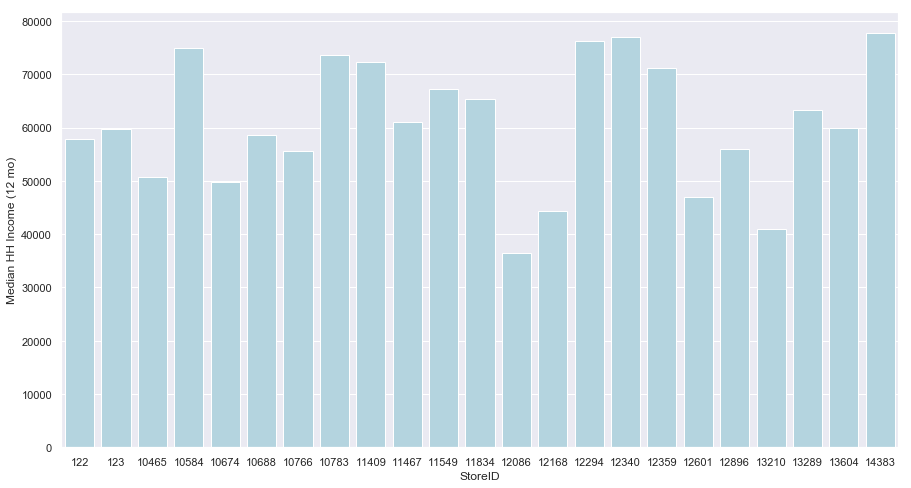

In [158]:
plt.figure(figsize=(15,8))
sns.barplot(x="StoreID", y="Median HH Income (12 mo)", data=store_census_median, color="lightblue")

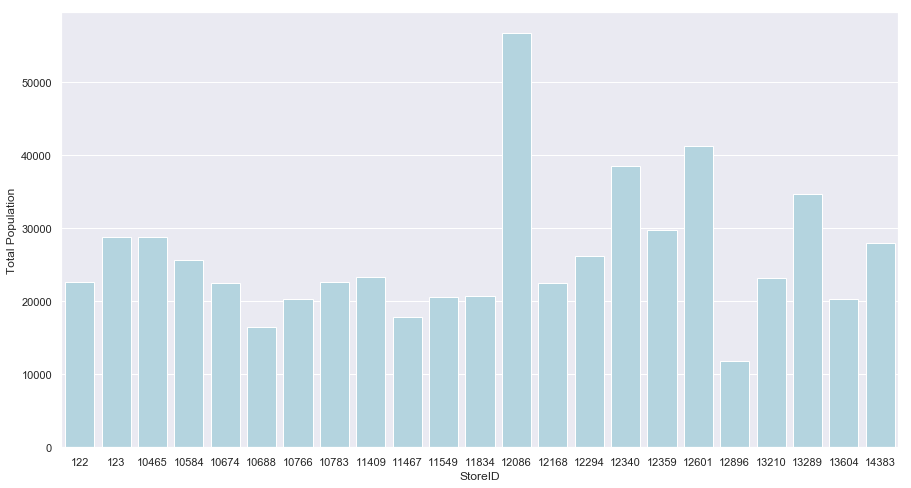

In [159]:
plt.figure(figsize=(15,8))
sns.barplot(x="StoreID", y="Total Population", data=store_census_median, color="lightblue")

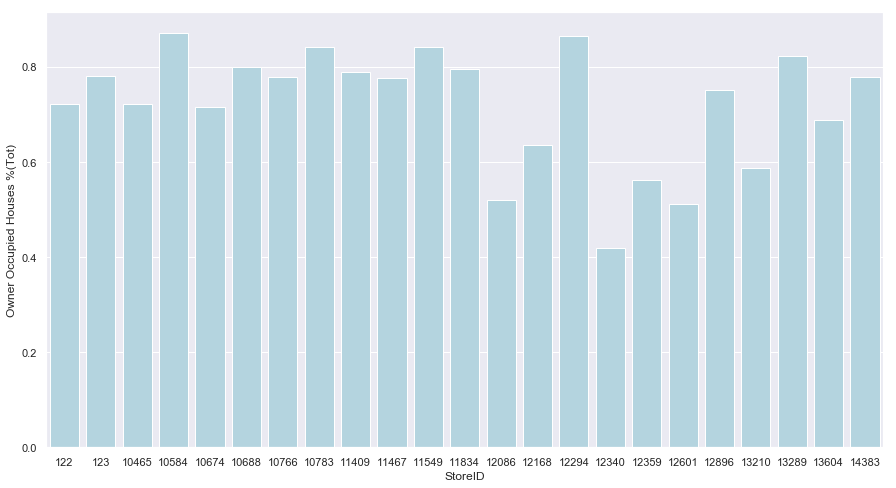

In [127]:
plt.figure(figsize=(15,8))
sns.barplot(x="StoreID", y="Owner Occupied Houses %(Tot)", data=store_census_median, color="lightblue")

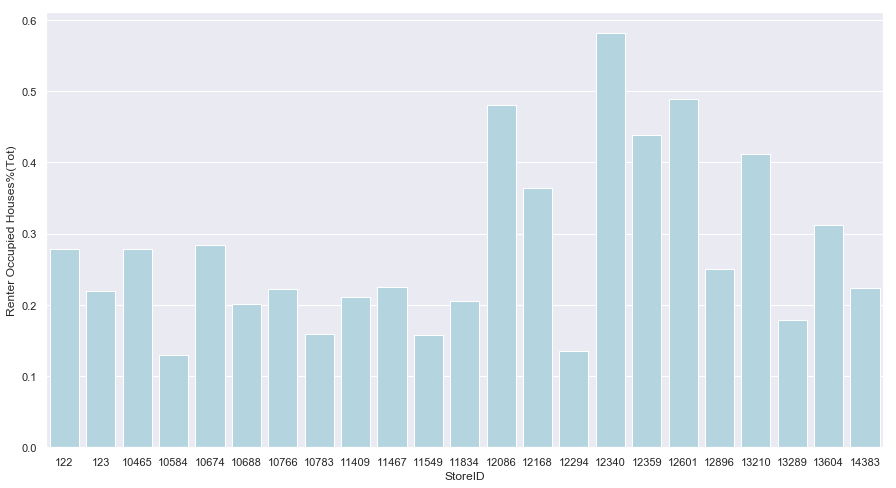

In [128]:
plt.figure(figsize=(15,8))
sns.barplot(x="StoreID", y="Renter Occupied Houses%(Tot)", data=store_census_median, color="lightblue")

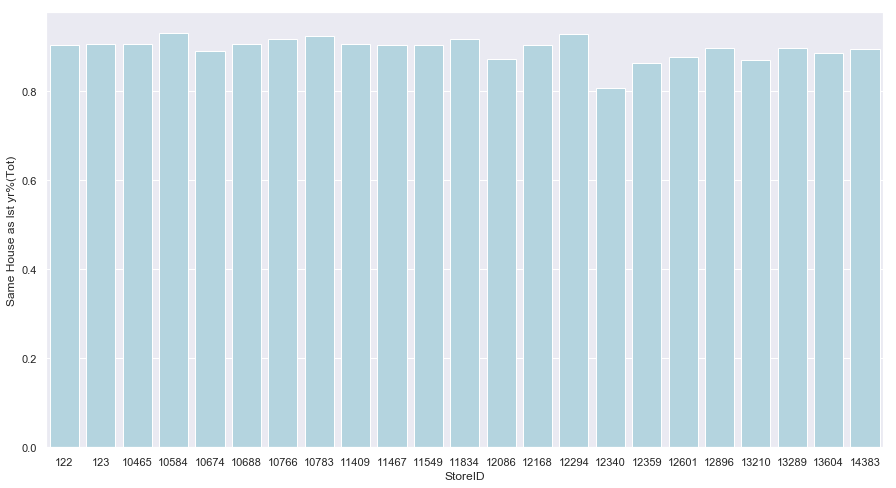

In [133]:
plt.figure(figsize=(15,8))
sns.barplot(x="StoreID", y="Same House as lst yr%(Tot)", data=store_census_median, color="lightblue")

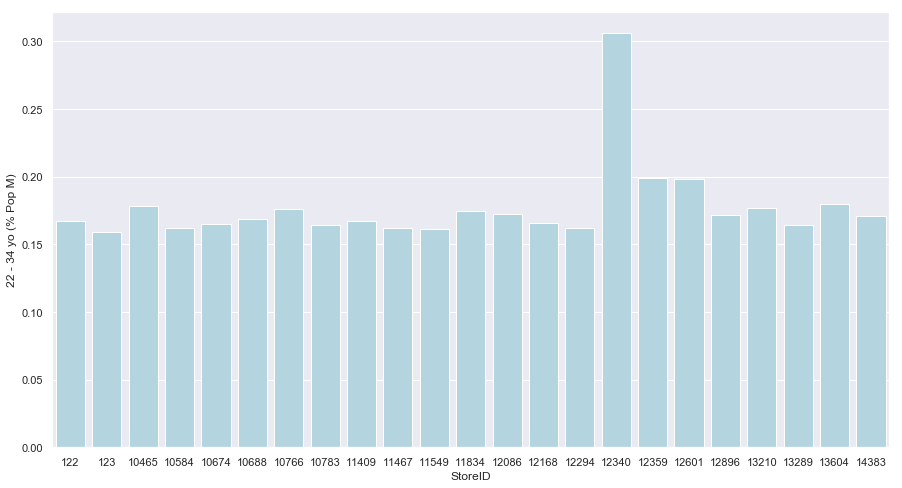

In [160]:
plt.figure(figsize=(15,8))
sns.barplot(x="StoreID", y="22 - 34 yo (% Pop M)", data=store_census_median, color="lightblue")

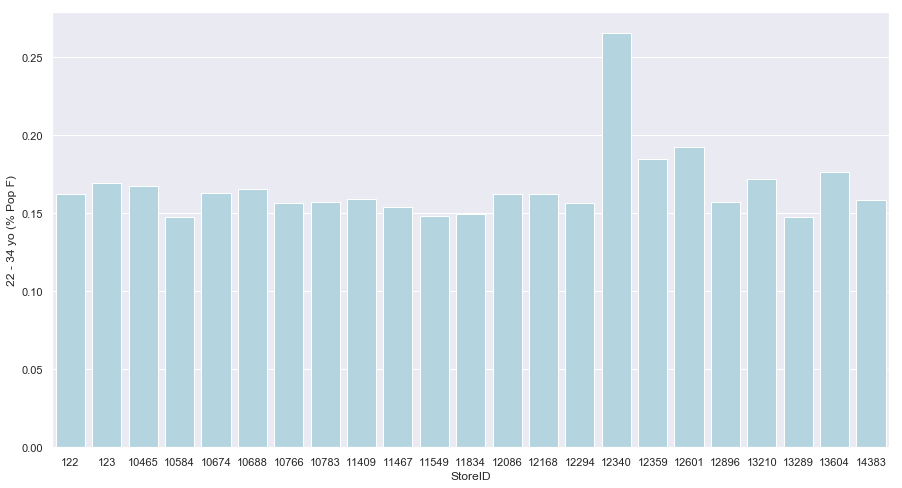

In [161]:
plt.figure(figsize=(15,8))
sns.barplot(x="StoreID", y="22 - 34 yo (% Pop F)", data=store_census_median, color="lightblue")

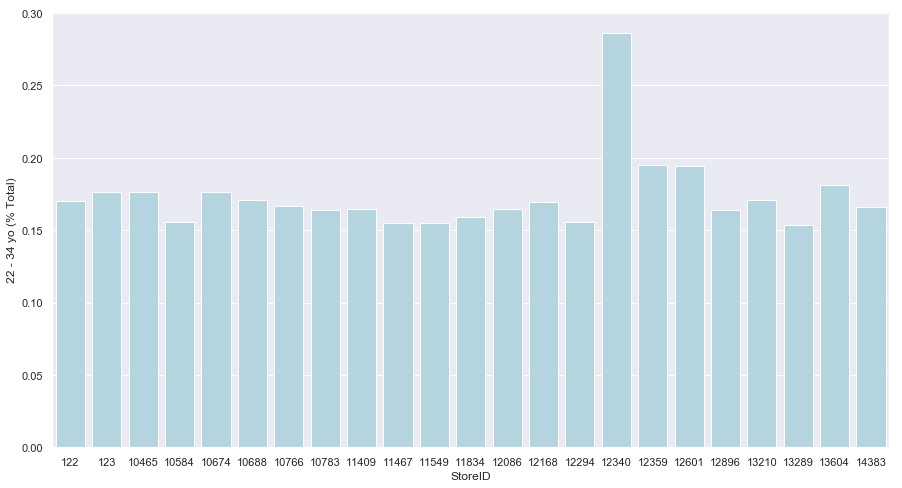

In [162]:
plt.figure(figsize=(15,8))
sns.barplot(x="StoreID", y="22 - 34 yo (% Total)", data=store_census_median, color="lightblue")

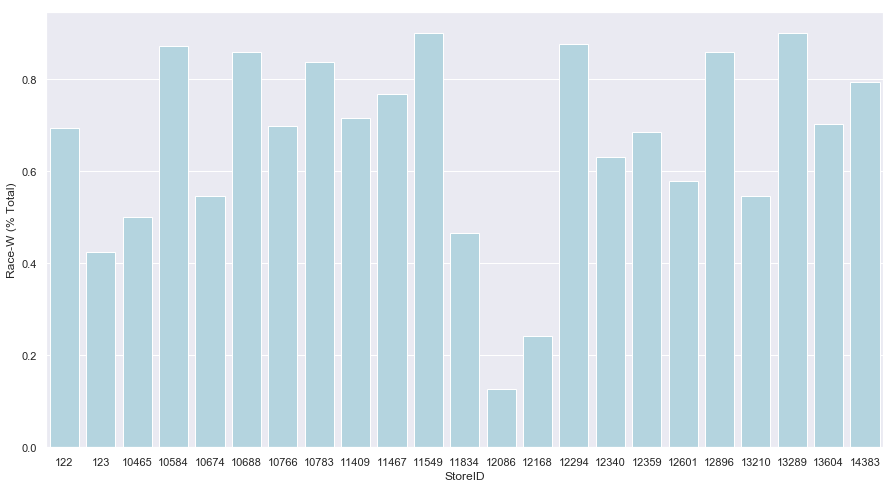

In [163]:
plt.figure(figsize=(15,8))
sns.barplot(x="StoreID", y="Race-W (% Total)", data=store_census_median, color="lightblue")

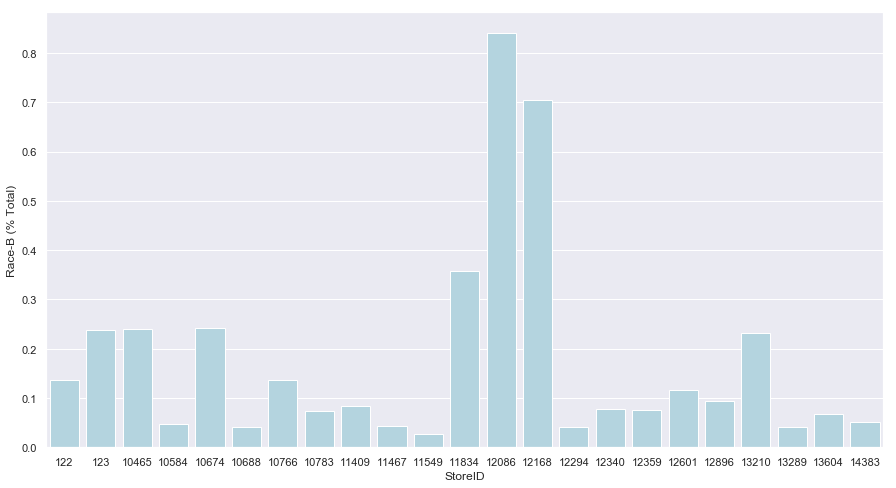

In [164]:
plt.figure(figsize=(15,8))
sns.barplot(x="StoreID", y="Race-B (% Total)", data=store_census_median, color="lightblue")

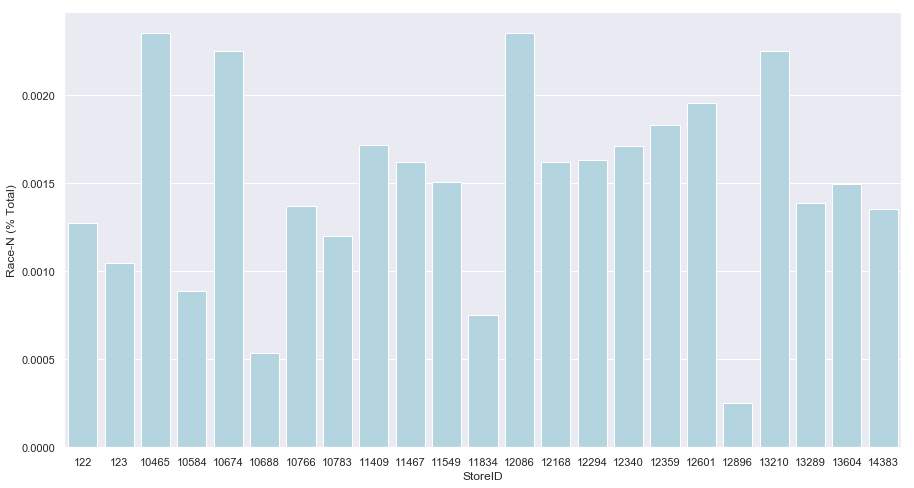

In [165]:
plt.figure(figsize=(15,8))
sns.barplot(x="StoreID", y="Race-N (% Total)", data=store_census_median, color="lightblue")

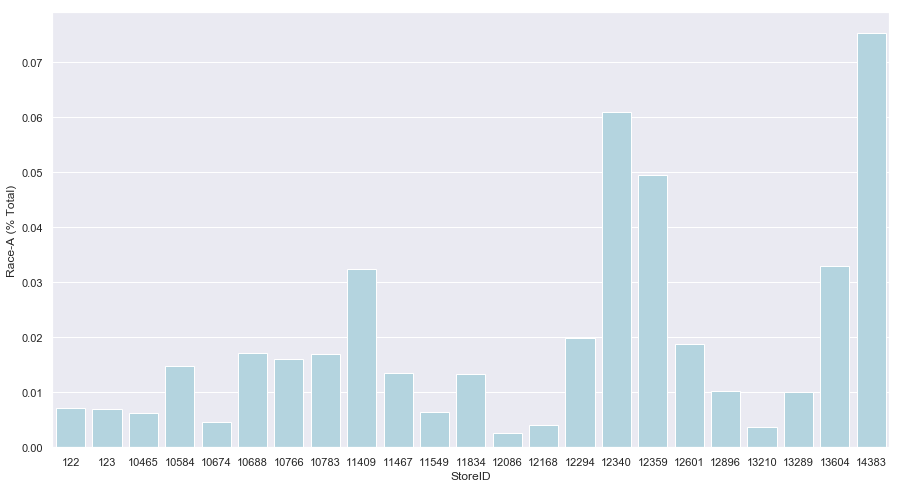

In [166]:
plt.figure(figsize=(15,8))
sns.barplot(x="StoreID", y="Race-A (% Total)", data=store_census_median, color="lightblue")

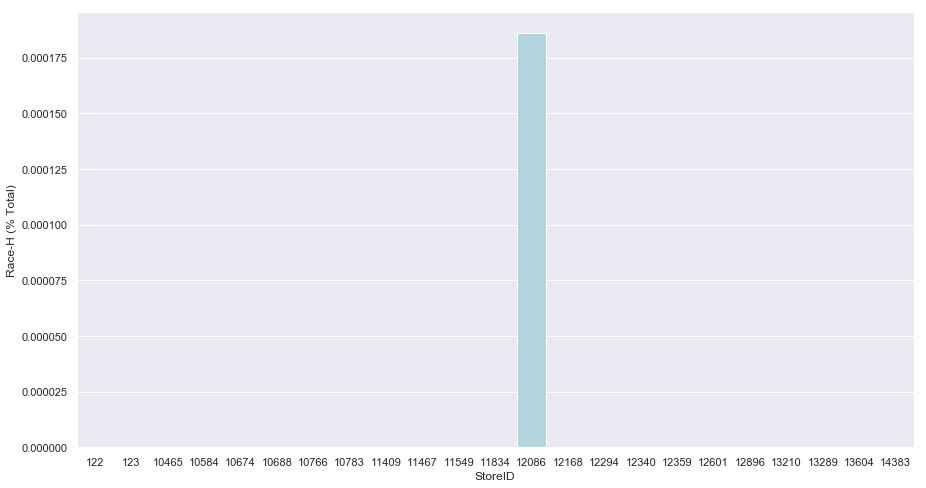

In [167]:
plt.figure(figsize=(15,8))
sns.barplot(x="StoreID", y="Race-H (% Total)", data=store_census_median, color="lightblue")